In [1]:
import os 

In [3]:
cdw1=os.chdir(r'S:\Mohammad stuff\data min')

In [4]:
import pandas as pd
data=pd.read_csv(r'S:\Mohammad stuff\data min\concrete_data.csv')
print(data)

      cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0               1040.0            676.0   28                          79.99  
1  

data=pd.read_csv(r'S:\Mohammad stuff\data min\concrete_data.csv')
print(data)

data=pd.read_csv(r'S:\Mohammad stuff\data min\concrete_data.csv')
print(data)

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings("ignore")
import math 
%matplotlib inline 

In [8]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
data.shape

(1030, 9)

In [12]:
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [13]:
#no missing obs 

<Figure size 1800x1000 with 0 Axes>

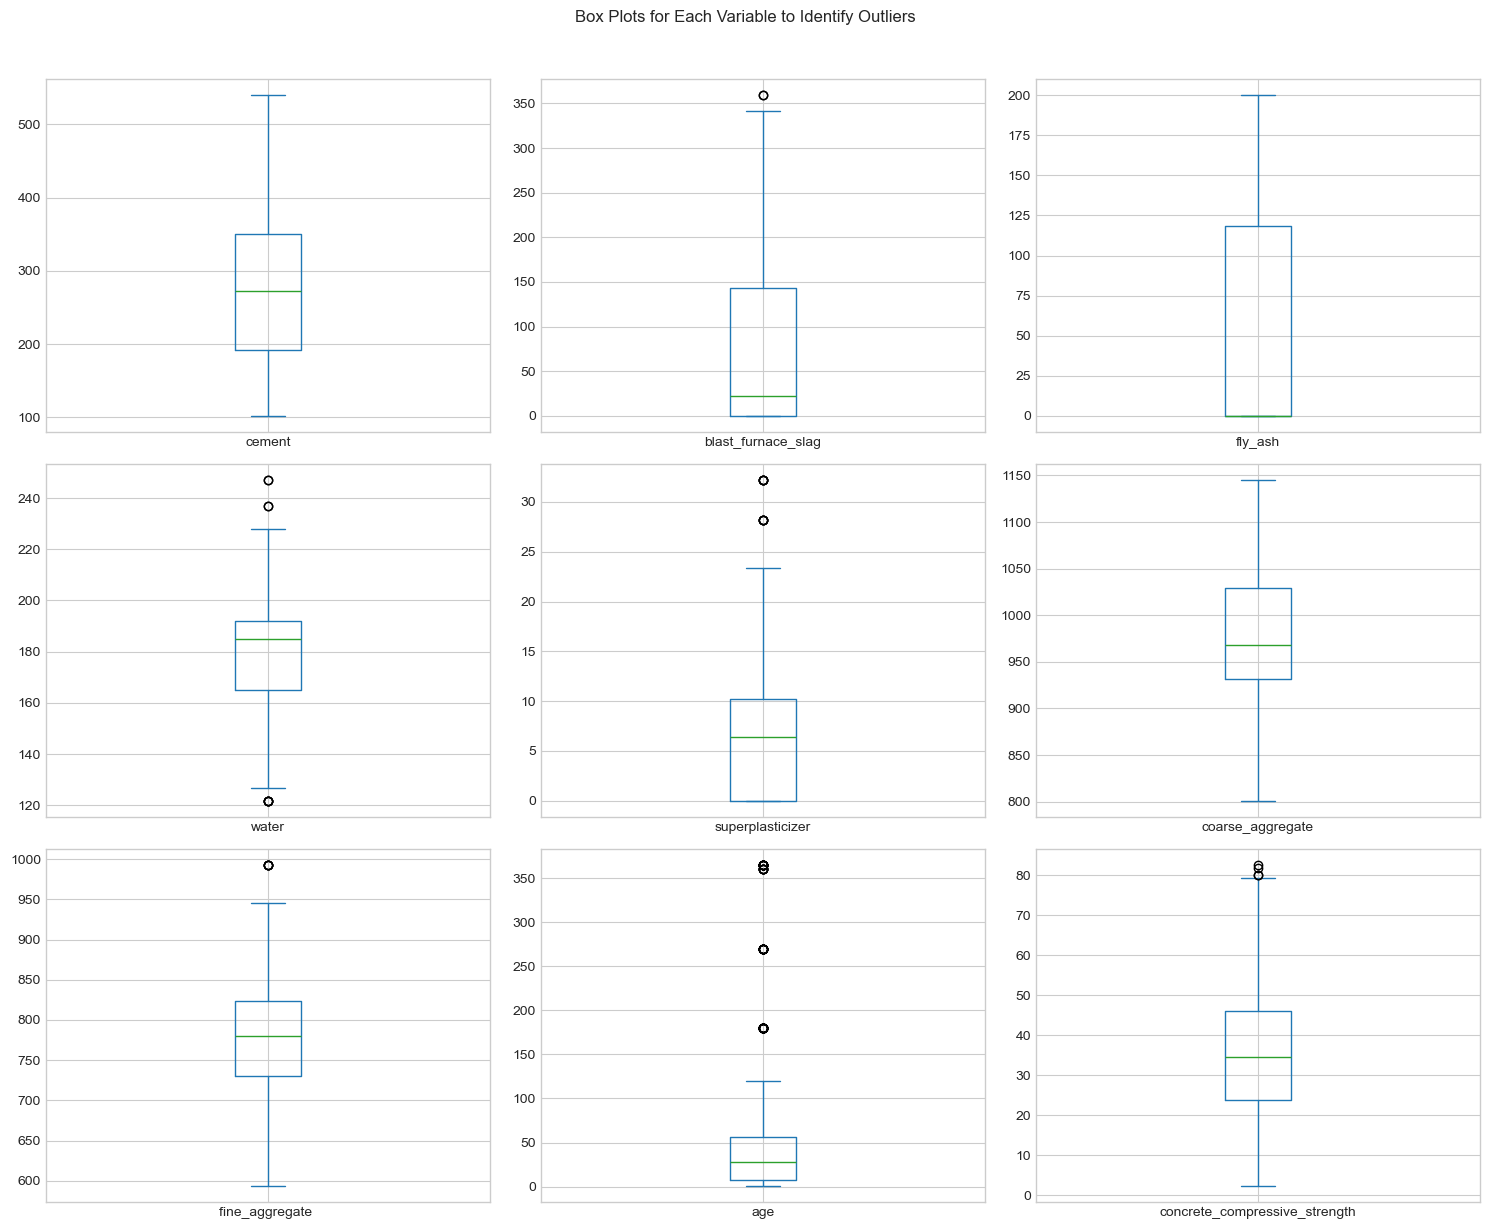

In [16]:
plt.style.use('seaborn-v0_8-whitegrid') 
plt.figure(figsize=(18, 10)) 

data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 12), sharex=False, sharey=False)
plt.suptitle('Box Plots for Each Variable to Identify Outliers', y=1.02)
plt.tight_layout()
plt.show()


Plotting Histograms...


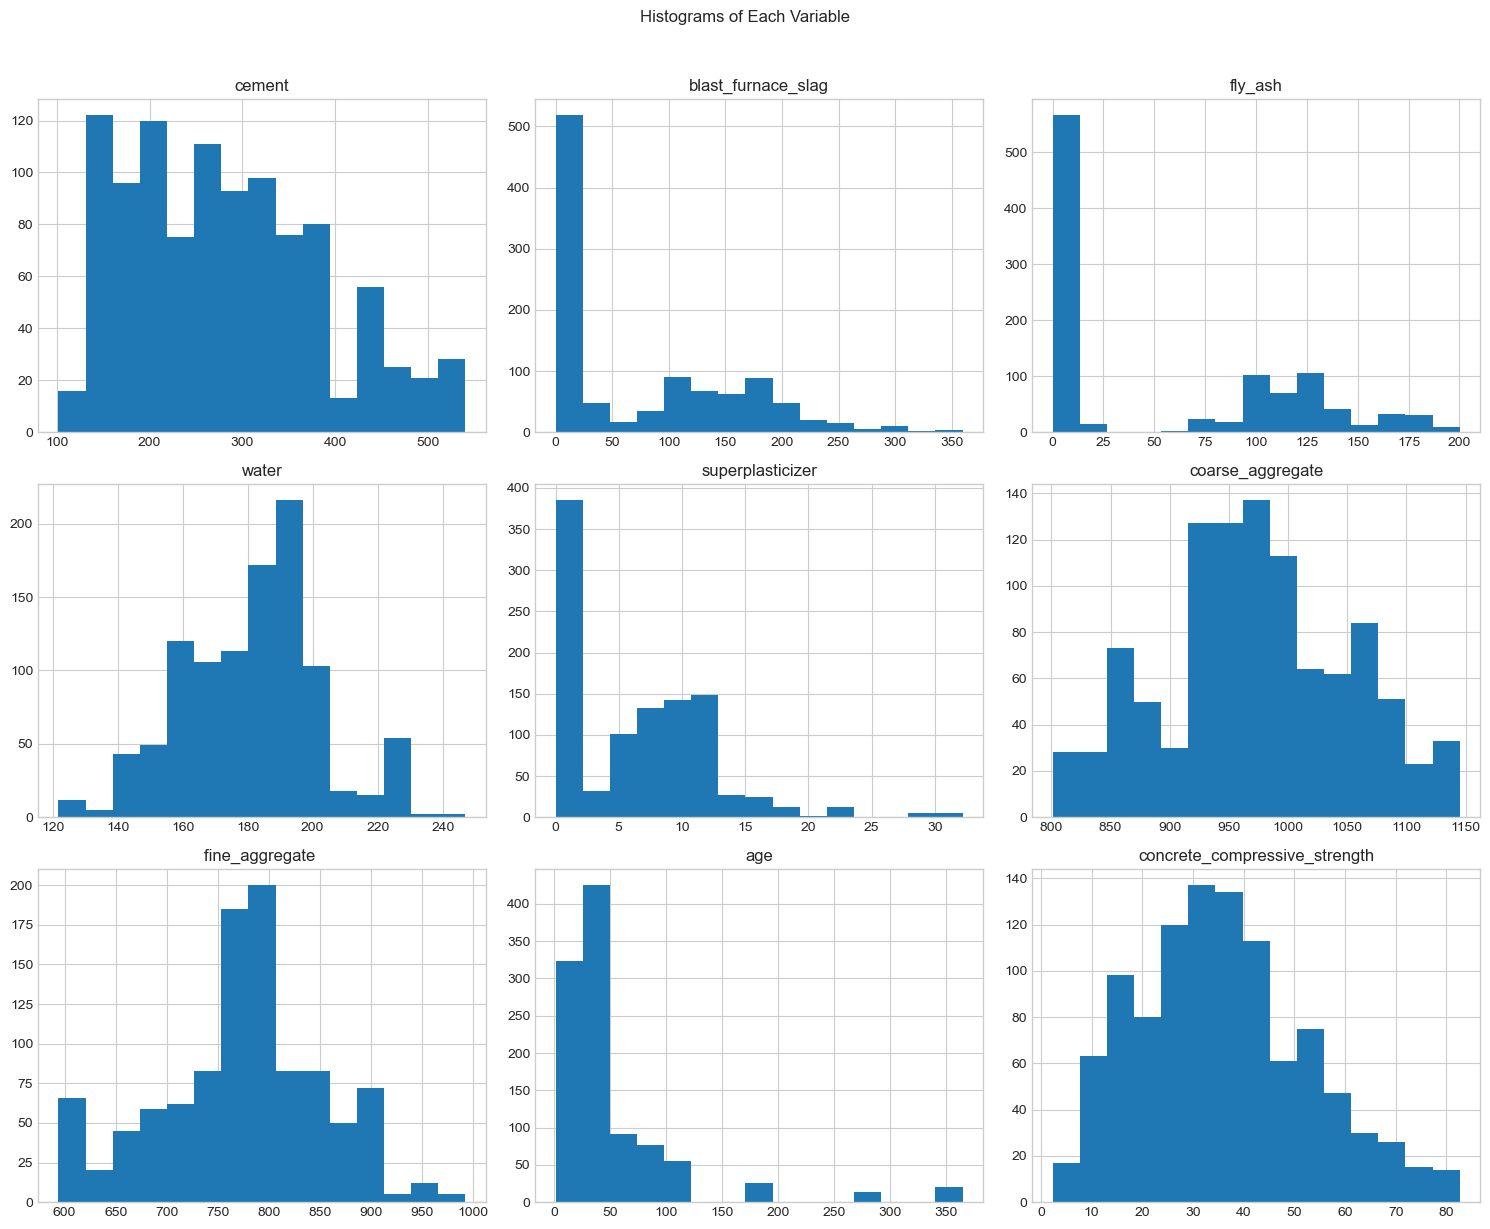

In [17]:
print("\nPlotting Histograms...") #EDA
data.hist(figsize=(15, 12), bins=15)
plt.suptitle('Histograms of Each Variable', y=1.02)
plt.tight_layout()
plt.show()


Calculating and Plotting Correlation Matrix...


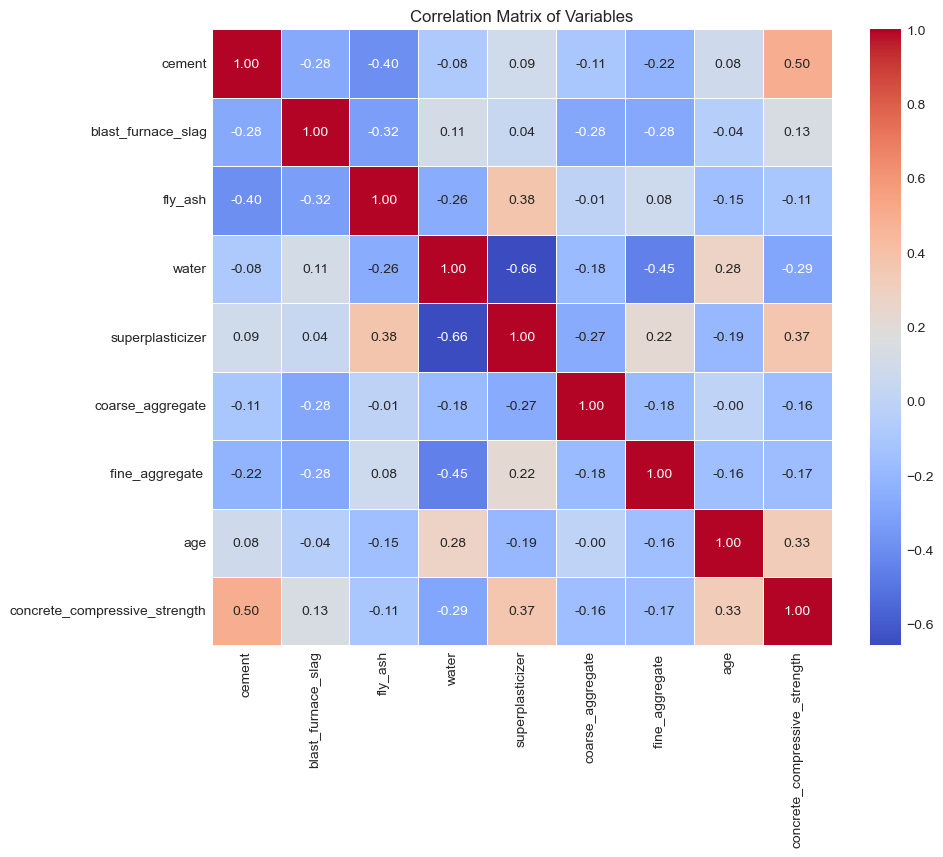


--- Calculating VIF ---


ValueError: Cannot set a DataFrame with multiple columns to the single column feature

In [26]:
print("\nCalculating and Plotting Correlation Matrix...")
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



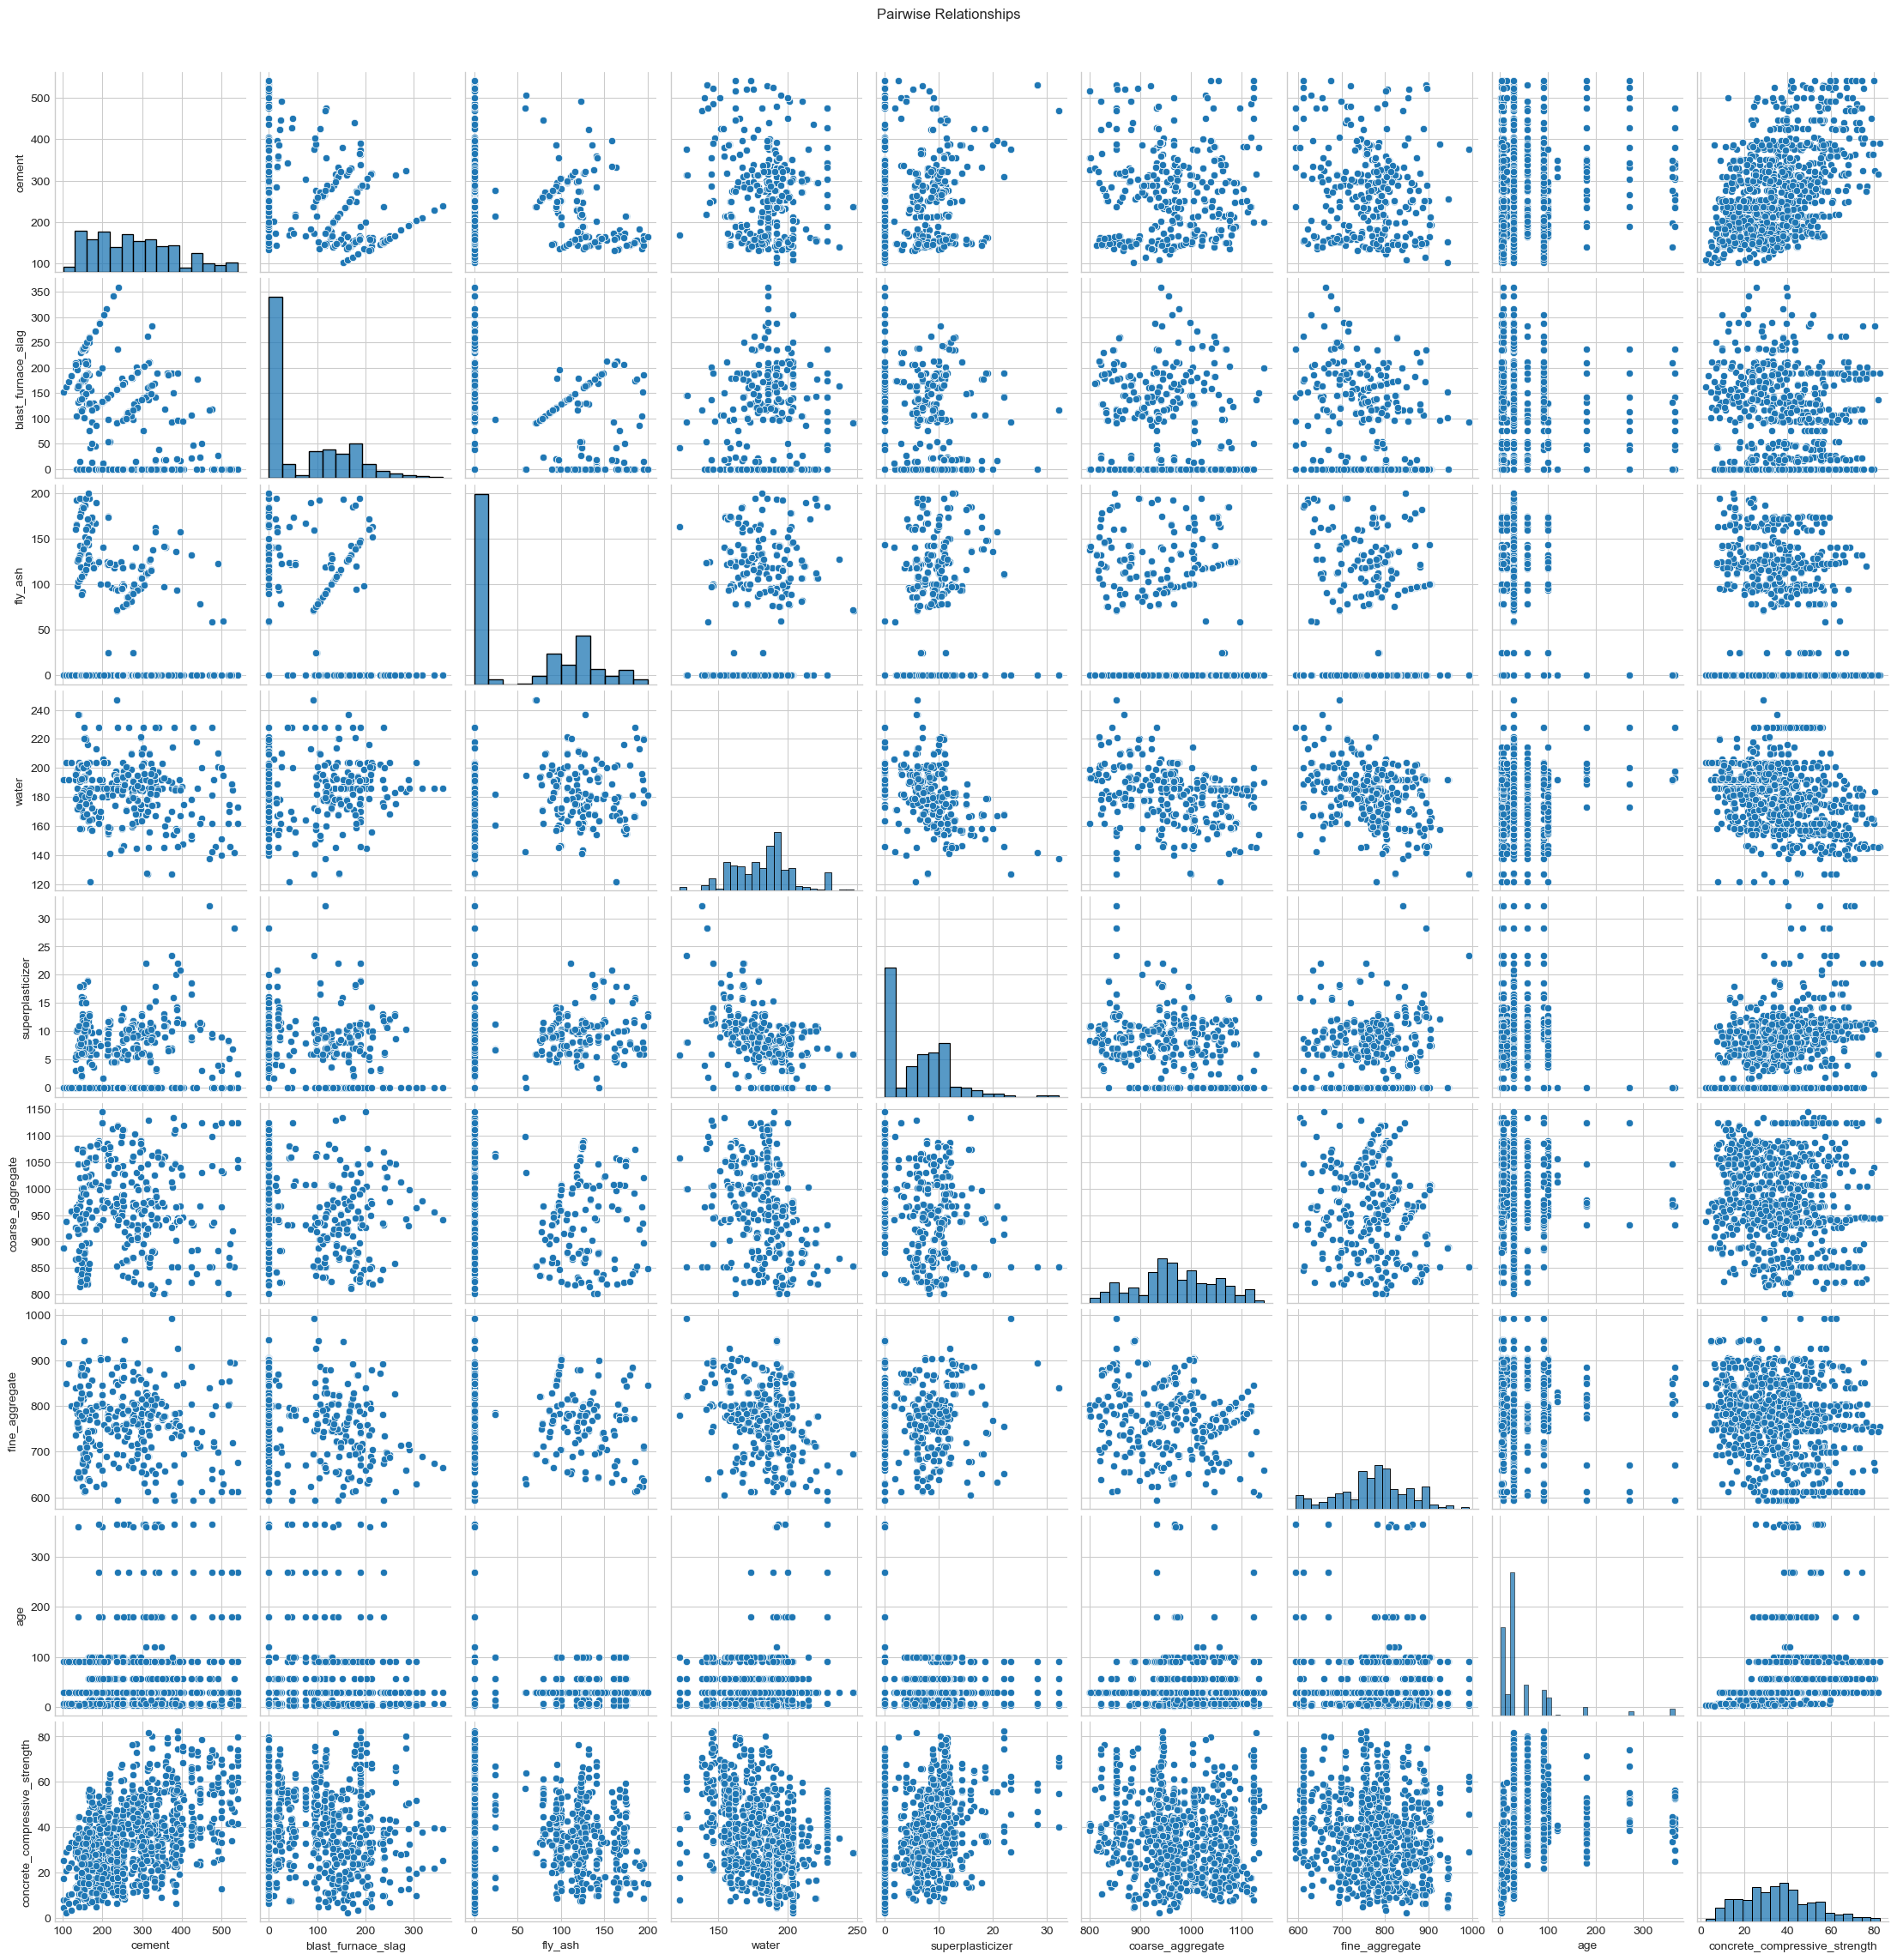

In [30]:
sns.pairplot(data)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop(columns=['concrete_compressive_strength']))
y = data['concrete_compressive_strength']
X_scaled = pd.DataFrame(X_scaled, columns=data.columns[:-1])
print("\nNormalized Features:")
print(X_scaled.head())
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



Normalized Features:
     cement  blast_furnace_slag   fly_ash     water  superplasticizer  \
0  2.477915           -0.856888 -0.847144 -0.916764         -0.620448   
1  2.477915           -0.856888 -0.847144 -0.916764         -0.620448   
2  0.491425            0.795526 -0.847144  2.175461         -1.039143   
3  0.491425            0.795526 -0.847144  2.175461         -1.039143   
4 -0.790459            0.678408 -0.847144  0.488793         -1.039143   

   coarse_aggregate  fine_aggregate        age  
0          0.863154        -1.217670 -0.279733  
1          1.056164        -1.217670 -0.279733  
2         -0.526517        -2.240917  3.553066  
3         -0.526517        -2.240917  5.057677  
4          0.070527         0.647884  4.978487  


In [68]:
from sklearn.model_selection import train_test_split 
X = X_scaled
y = data['concrete_compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
alphas = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]
param_grid = {
    'alpha': alphas,
    'l1_ratio': l1_ratios
}
grid_search=GridSearchCV(ElasticNet(),param_grid,scoring='r2',cv=5)
grid_search.fit(X_train,y_train)
print("Best Param",grid_search.best_params_)
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']


Best Param {'alpha': 0.01, 'l1_ratio': 0.5}


In [73]:
model=ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=1)
model.fit(X_train,y_train)

ElasticNet(alpha=0.01, random_state=1)

In [75]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
y_pred=model.predict(X_test)
MSE=mean_squared_error(y_test, y_pred)
RMSE=pow(MSE,1/2)
MAE=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(MSE)
print(RMSE)
print(MAE)
print(r2)


96.02790963061294
9.799383125003988
7.7742313354521055
0.6273320901825545


In [78]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (824, 8)
Shape of y_train: (824,)


In [80]:
param={'n_estimators':[5,10,15,20],'max_depth':[8,9,10,11]}
n_splits = 5 
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [82]:
RFR=RandomForestRegressor()
Rand_Search = RandomizedSearchCV(RFR, 
                                 param_distributions=param,
                                 n_iter=5,
                                 cv=kf, 
                                 scoring='neg_mean_squared_error', 
                                 random_state=42)

In [84]:
Rand_Search.fit(X_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [8, 9, 10, 11],
                                        'n_estimators': [5, 10, 15, 20]},
                   random_state=42, scoring='neg_mean_squared_error')

In [87]:
RF=RandomForestRegressor(max_depth=11, n_estimators=15)
RF.fit(X_train,y_train)
Y_pred=RF.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
MSE=mean_squared_error(y_test, Y_pred)
RMSE=pow(MSE,1/2)
MAE=mean_absolute_error(y_test, Y_pred)
r2=r2_score(y_test, Y_pred)
print(MSE)
print(RMSE)
print(MAE)
print(r2)

34.27397528140412
5.854397943546725
4.239590912983212
0.866988558030802


In [93]:
print(RF.intercept_)

AttributeError: 'RandomForestRegressor' object has no attribute 'intercept_'